In [1]:
partition[g_] := Module[{vertex, u, v, c, list},
  vertex = VertexList[g]; 
  u = {};
  v = {};
  c = Complement[vertex, Join[u, v]]; (* Vértices que no están en u ni en v *)
  
  While[c != {}, (* Mientras haya vértices no asignados *)
    list = GraphDistance[g, c[[1]]]; (* Distancias de c[[1]] a todos los vértices *)
    
    (* Iteramos sobre la lista de distancias *)
    For[j = 1, j <= Length[list], j++,
      If[NumericQ[list[[j]]], (* Verificamos si la distancia es numérica *)
        If[EvenQ[list[[j]]], 
          AppendTo[u, vertex[[j]]], (* Si la distancia es par, lo asignamos a u *)
          AppendTo[v, vertex[[j]]]  (* Si la distancia es impar, lo asignamos a v *)
        ]
      ]
    ];
    
    c = Complement[vertex, Join[u, v]] (* Actualizamos c con los vértices no asignados *)
  ];
  
  {u, v} (* Devolvemos los dos conjuntos de vértices *)
]

(* Función que verifica si un grafo es bipartito y retorna la 
partición de conjuntos si es así *)
partitionedSets[graph_] :=
    Module[{partitions},
        If[BipartiteGraphQ[graph],
            partitions = partition[graph];
            Print["Los conjuntos particionados son:"];
            Print["U = ", partitions[[1]], " y V = ", partitions[[2]]],
            "No es un grafo bipartito"
        ]
    ]

In [18]:
projections[graph_, setUorV_] :=
  Module[{set, projectedEdges},
    set = Switch[setUorV,
      U, partition[graph][[2]],
      V, partition[graph][[1]]
    ];
    projectedEdges = 
      DeleteDuplicates@Flatten[
        Subsets[#, {2}] & /@ (AdjacencyList[graph, #] & /@ set),
        1
      ];
    Graph[Union@Flatten[projectedEdges], UndirectedEdge @@@ projectedEdges]
  ];

Graph[<11>, <10>]
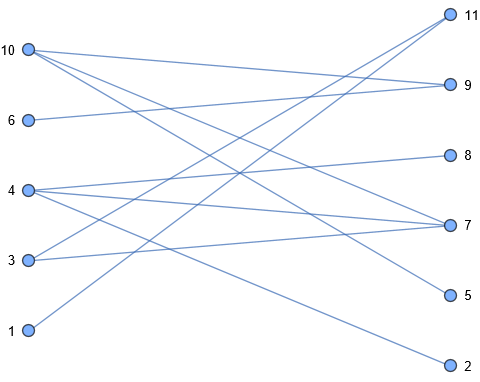

In [38]:
g = RandomGraph[{11, 10}, GraphLayout -> "BipartiteEmbedding", VertexLabels -> "Name"]

-Graphics-
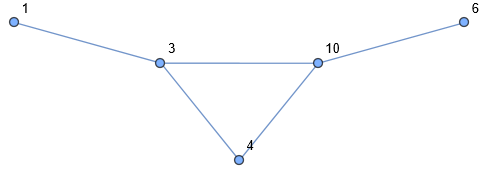

In [39]:
GraphPlot[projections[g, U], VertexLabels -> "Name"]